# Model explainability

In [24]:
import pandas as pd
import shap
import numpy as np
import pickle
import xgboost
import matplotlib.pylab as pl

In [18]:
from data_ops import add_not_liquid, clean_data, clean_ingredients_list, feature_engineering, to_categorical

In [20]:
train = pd.read_csv("../data/train.csv")
print(train.shape)

# Drop useless columns and Nan values
train = clean_data(train, columns=["id"], drop_na=True)
print(train.shape)

# Create new variables and modify others
X, y = feature_engineering(train)

(12000, 13)
Droping columns: ['id']
Deleting null values from data
(9406, 12)


In [23]:
# open a file, where you stored the pickled data
file = open('../models/advanced_model_xgb.pkl', 'rb')

# dump information to that file
clf = pickle.load(file)
clf = clf.best_estimator_

# close the file
file.close()

**Para plotear la importancia de nuestros features, tenemos la suerte de que nuestro algoritmo tiene métodos propios que nos ayudan con la explicabilidad del modelo, en este caso hemos seleccionado 3 tipos de ponderajes, pero, a grosso modo, los features más importantes son los valores nutricionales, y ligado a la pregunta de que es el target de nuestro dataset, es más obvio aún pensar que se trata de un feature que diferencia alimentos malos de buenos.. Según la libreria de XGBoost:**

**<br>‘weight’: the number of times a feature is used to split the data across all trees.
<br>‘gain’: the average gain across all splits the feature is used in.
<br>‘cover’: the average coverage across all splits the feature is used in.**

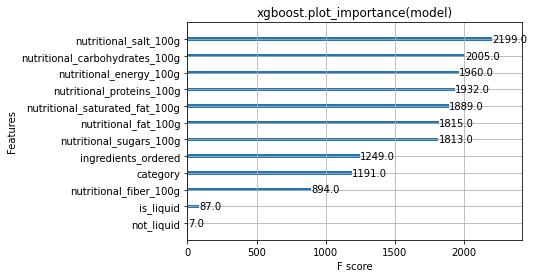

In [25]:
xgboost.plot_importance(clf)
pl.title("xgboost.plot_importance(model)")
pl.show()

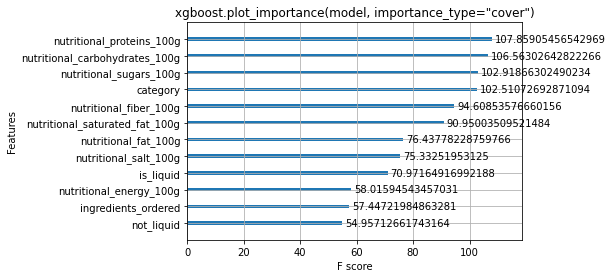

In [27]:
xgboost.plot_importance(clf, importance_type="cover")
pl.title('xgboost.plot_importance(model, importance_type="cover")')
pl.show()

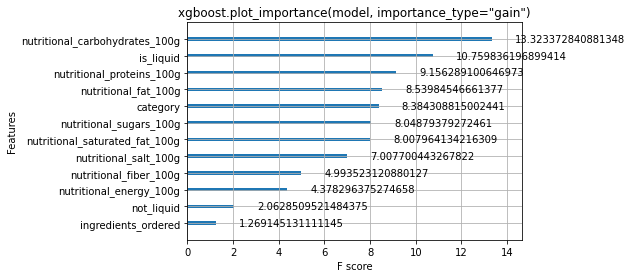

In [28]:
xgboost.plot_importance(clf, importance_type="gain")
pl.title('xgboost.plot_importance(model, importance_type="gain")')
pl.show()

**Otra libreria externa a nuestro modelo es SHAP (SHapley Additive exPlanations). El bar plot nos indica que features son más importantes para la librería, por otra parte hemos hecho un density plot que nos permite visualizar el impacto del modelo en el output.**

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


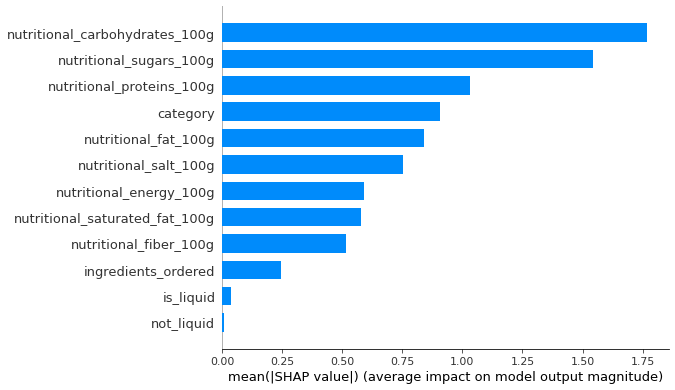

In [29]:
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X)

shap.summary_plot(shap_values, X, plot_type="bar")

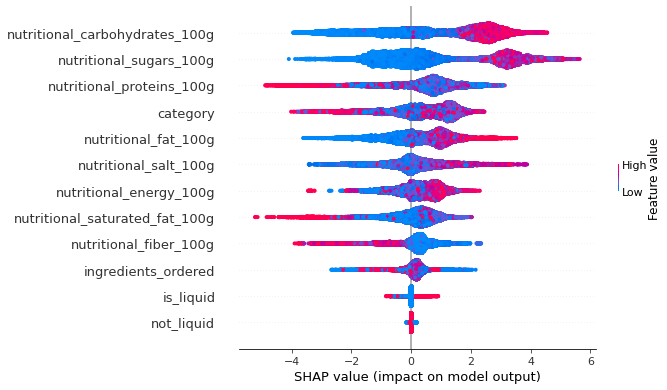

In [30]:
shap.summary_plot(shap_values, X)